In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('YelpDataset/df.csv')

In [19]:
df.head(10)

,Unnamed: 0,Auto Repair,Grocery,Interior Design,Restaurants,Sushi Bars,Tobacco Shops,Diners,Drugstores,Hardware Stores,...,Hotels & Travel,Steakhouses,Education,Airport Shuttles,Computers,Vegan,Bars,IT Services & Computer Repair,Cajun/Creole,Farmers Market
0,JE2qFjL4BaUbiI-cT5MSBw,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,4rYg5UywNqmKywRWJXOp4g,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ulQ8Nyj7jCUR8M83SUMoRQ,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,ZcLKXikTHYOnYt5VYRO5sg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,PZNMPWCViVX8JLsn10MSnQ,0.0,3.0,1.0,5.0,0.0,0.0,0.0,7.0,1.0,...,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,ObtNPACE7Cv07k9t7aM2YQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,e7CFEOn4y2dsS61-9SbCeA,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,bMBJlqFfwslLXJmoMNuTJA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,blrWvPePSv87aU9hV1Zd8Q,0.0,2.0,0.0,9.0,0.0,0.0,0.0,4.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,9.0,0.0,1.0,3.0
9,fmzIm7RxEdii5Jz44PtO7g,8.0,2.0,0.0,14.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,2.0,0.0,3.0,0.0,9.0,3.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Columns: 229 entries, Unnamed: 0 to  Farmers Market
dtypes: float64(228), object(1)
memory usage: 53.8+ KB


In [5]:
# Retirando id's dos usuários
X = df.drop(['Unnamed: 0'], axis=1)

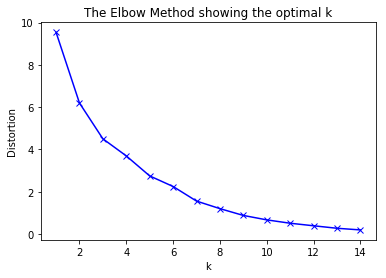

In [6]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist

# Método do cotovelo
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
predict = kmeans.fit_predict(X)
print(predict)

[0 0 0 0 3 0 0 0 2 1 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [17]:
np.set_printoptions(threshold=np.inf)
kmeans.cluster_centers_

array([[ 0.00000000e+00, -2.77555756e-17,  0.00000000e+00,
         2.69230769e-01,  3.84615385e-02,  0.00000000e+00,
         0.00000000e+00,  7.69230769e-02,  0.00000000e+00,
         3.84615385e-02,  0.00000000e+00,  2.22044605e-16,
        -2.77555756e-17, -2.77555756e-17,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.84615385e-02,  0.00000000e+00,  3.84615385e-02,
         3.84615385e-02,  3.84615385e-02,  0.00000000e+00,
        -2.77555756e-17, -5.55111512e-17,  7.69230769e-02,
         3.84615385e-02,  2.77555756e-17,  3.84615385e-02,
         0.00000000e+00,  3.84615385e-02,  3.84615385e-02,
         3.84615385e-02,  0.00000000e+00,  3.84615385e-02,
         2.69230769e-01, -2.77555756e-17,  1.53846154e-01,
         0.00000000e+00, -2.77555756e-17,  3.84615385e-02,
         2.77555756e-17,  0.00000000e+00,  3.84615385e-02,
         0.00000000e+00,  3.84615385e-02,  3.84615385e-02,
         0.00000000e+00,  3.84615385e-02,  3.84615385e-0

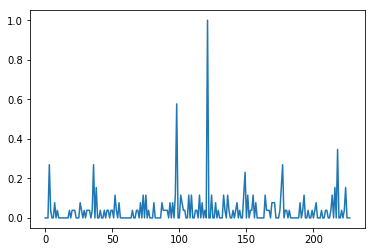

In [38]:
plt.plot(kmeans.cluster_centers_[0])

In [72]:
a = kmeans.cluster_centers_[0]
values = [j for (i,j) in zip(a,X) if i >= 0.2]
values

['Restaurants',
 ' Coffee & Tea',
 ' Food',
 ' Restaurants',
 ' Fast Food',
 'Airports',
 ' Hotels & Travel']

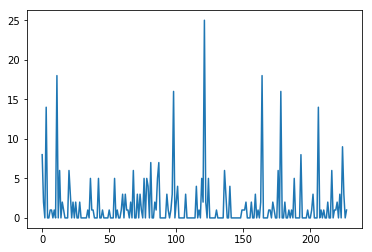

In [25]:
plt.plot(kmeans.cluster_centers_[1])

In [64]:
a = kmeans.cluster_centers_[1]
values = [j for (i,j) in zip(a,X) if i >= 10]
values

['Restaurants',
 ' Fitness & Instruction',
 ' Food',
 ' Restaurants',
 ' Active Life',
 'Gyms',
 ' American (Traditional)']

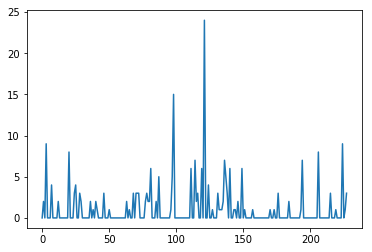

In [26]:
plt.plot(kmeans.cluster_centers_[2])

In [67]:
a = kmeans.cluster_centers_[2]
values = [j for (i,j) in zip(a,X) if i >= 7]
values

['Restaurants',
 ' Burgers',
 ' Food',
 ' Beer',
 ' Restaurants',
 ' Automotive',
 ' Wine & Spirits',
 ' American (Traditional)',
 ' Bars']

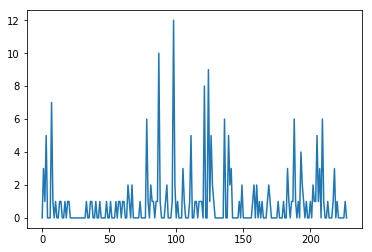

In [28]:
plt.plot(kmeans.cluster_centers_[3])

In [68]:
a = kmeans.cluster_centers_[3]
values = [j for (i,j) in zip(a,X) if i >= 6]
values

[' Drugstores',
 ' Department Stores',
 'Shopping',
 ' Food',
 ' Restaurants',
 ' Shopping',
 ' Automotive',
 ' Fashion',
 ' Home & Garden']

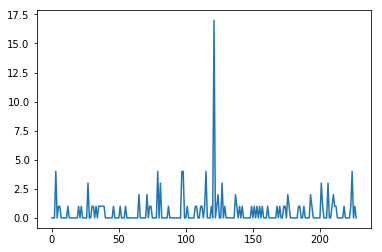

In [29]:
plt.plot(kmeans.cluster_centers_[4])

In [69]:
a = kmeans.cluster_centers_[4]
values = [j for (i,j) in zip(a,X) if i >= 3]
values

['Restaurants',
 'Fondue',
 ' Seafood',
 ' Nightlife',
 ' American (New)',
 ' Food',
 ' Sandwiches',
 ' Restaurants',
 ' Pizza',
 'Italian',
 ' American (Traditional)',
 ' Bars']